In [22]:
# Import the Neuron Functionality
from IFneuron import *
import numpy as np

# Ensures that I can reproduce my tests
#np.random.seed(42)  

In [29]:
# Lets Create a Simulations Loop
run_time_ms = 3000
simulation_count = 1000
spike_rates_true = np.zeros((5, simulation_count))

# Run multiple simulations to gather information
for simulation_id in range(simulation_count):

    # Initiate the Various Neurons
    neuron_A = IFneuron('A')
    neuron_B = IFneuron('B')
    neuron_C = IFneuron('C')
    neuron_D = IFneuron('D')
    neuron_E = IFneuron('E')

    # Create Ground Truth Network C = Inhibitory A,B,D = Excitatory
    # Inhibitory Weight : -1 , Excitatory Weight : 1

    # Connect the Receptors for each Neuron
    neuron_C.receptors = [(neuron_A, 0.7), (neuron_B, 0.7)];
    neuron_D.receptors = [(neuron_A, 1.0), (neuron_B, 6.0)];
    neuron_E.receptors = [(neuron_C, -1.0), (neuron_D, 1.0)];

    # Generate Random Stimulation Times
    stim_times_A = np.random.randint( 5, 3000, size = 6);
    stim_times_B = np.random.randint( 5, 3000, size = 6);

    # Let us now attach those stimulation times to the neurons
    for i in stim_times_A:
        neuron_A.attach_direct_stim(i)

    for i in stim_times_B:
        neuron_B.attach_direct_stim(i)

    # Concatenate all the Neurons Together for Easy Time Step Updates
    neurons = [neuron_A, neuron_B, neuron_C, neuron_D, neuron_E]
    for time_step in range(run_time_ms):
        for neuron_is in neurons:
            neuron_is.update(time_step,True)
            
    # Store the # of spikes each neuron generated for each simulation
    for neuron_id,neuron in enumerate(neurons):
        spike_rates_true[neuron_id, simulation_id] = len(neuron.t_act_ms) 

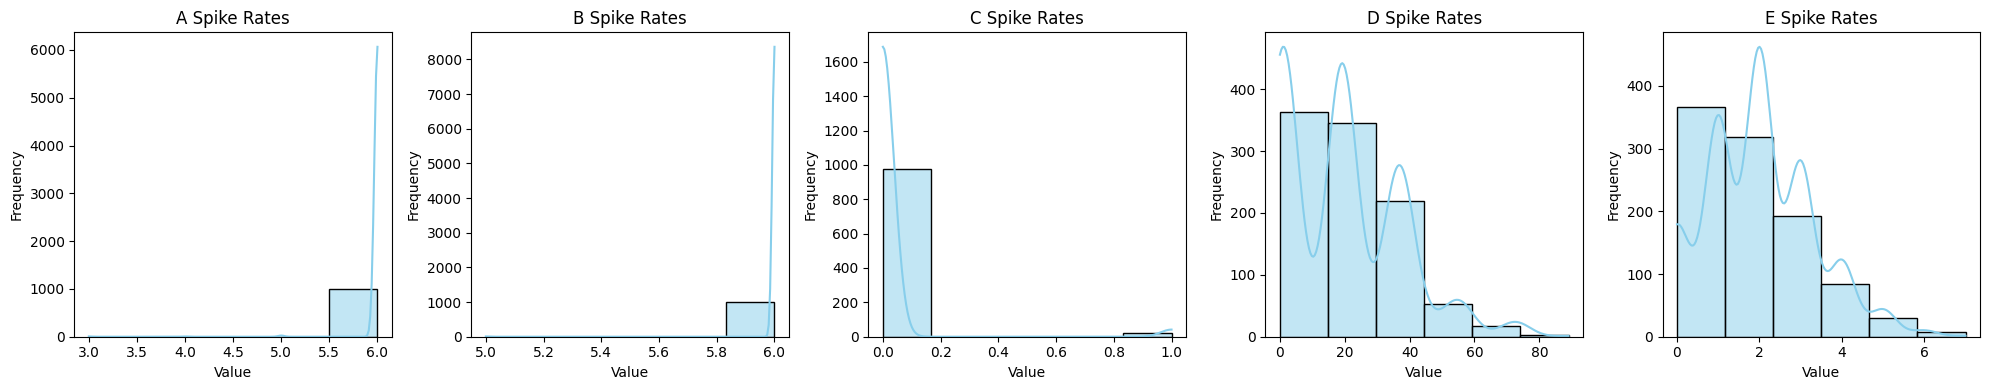

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lets plot the Different Histograms for Spike Times 
neuron_names = ['A','B','C','D','E']
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4)) 

for i,neuron_id in enumerate(neuron_names):

    # Identify placement of subplot
    ax = axes[i]  # Select subplot axis
    sns.histplot(spike_rates_true[i, :], bins=6, kde=True, color='skyblue', ax=ax)
    ax.set_title(f"{neuron_id} Spike Rates")
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

    
# Tight Layout will make sure they dont overlap
plt.tight_layout()
plt.show()

In [35]:
# Lets run the wrong model now!
spike_rates_predicted = np.zeros((5, simulation_count))

# Run multiple simulations to gather information
for simulation_id in range(simulation_count):

    # Initiate the Various Neurons
    neuron_A = IFneuron('A')
    neuron_B = IFneuron('B')
    neuron_C = IFneuron('C')
    neuron_D = IFneuron('D')
    neuron_E = IFneuron('E')

    # Create Ground Truth Network C = Inhibitory A,B,D = Excitatory
    # Inhibitory Weight : -1 , Excitatory Weight : 1

    # Connect the Receptors for each Neuron
    neuron_C.receptors = [(neuron_A, 1.0), (neuron_B, 1.0)]; # Ground Truth: [(neuron_A, 0.7), (neuron_B, 0.7)];
    neuron_D.receptors = [(neuron_A, 1.0), (neuron_B, 1.0)]; # Ground Truth: [(neuron_A, 1.0), (neuron_B, 6.0)];
    neuron_E.receptors = [(neuron_C, 1.0), (neuron_D, 8.0)]; # Ground Truth: [(neuron_C, -1.0), (neuron_D, 1.0)];

    # Generate Random Stimulation Times
    stim_times_A = np.random.randint( 5, 3000, size = 6);
    stim_times_B = np.random.randint( 5, 3000, size = 6);

    # Let us now attach those stimulation times to the neurons
    for i in stim_times_A:
        neuron_A.attach_direct_stim(i)

    for i in stim_times_B:
        neuron_B.attach_direct_stim(i)

    # Concatenate all the Neurons Together for Easy Time Step Updates
    neurons = [neuron_A, neuron_B, neuron_C, neuron_D, neuron_E]
    for time_step in range(run_time_ms):
        for neuron_is in neurons:
            neuron_is.update(time_step,True)
            
    # Store the # of spikes each neuron generated for each simulation
    for neuron_id,neuron in enumerate(neurons):
        spike_rates_predicted[neuron_id, simulation_id] = len(neuron.t_act_ms) 

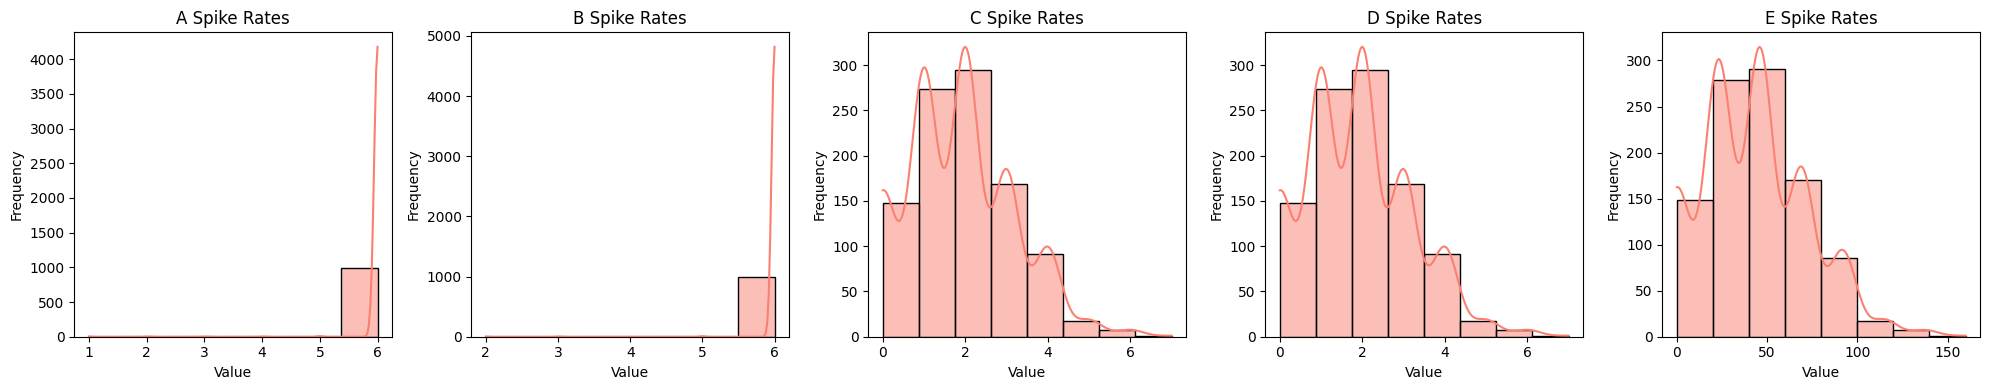

In [36]:
# Lets plot the Different Histograms for Spike Times 
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4)) 

for i,neuron_id in enumerate(neuron_names):

    # Identify placement of subplot
    ax = axes[i]  # Select subplot axis
    sns.histplot(spike_rates_predicted[i, :], bins=8, kde=True, color='salmon', ax=ax)
    ax.set_title(f"{neuron_id} Spike Rates")
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

    
# Tight Layout will make sure they dont overlap
plt.tight_layout()
plt.show()

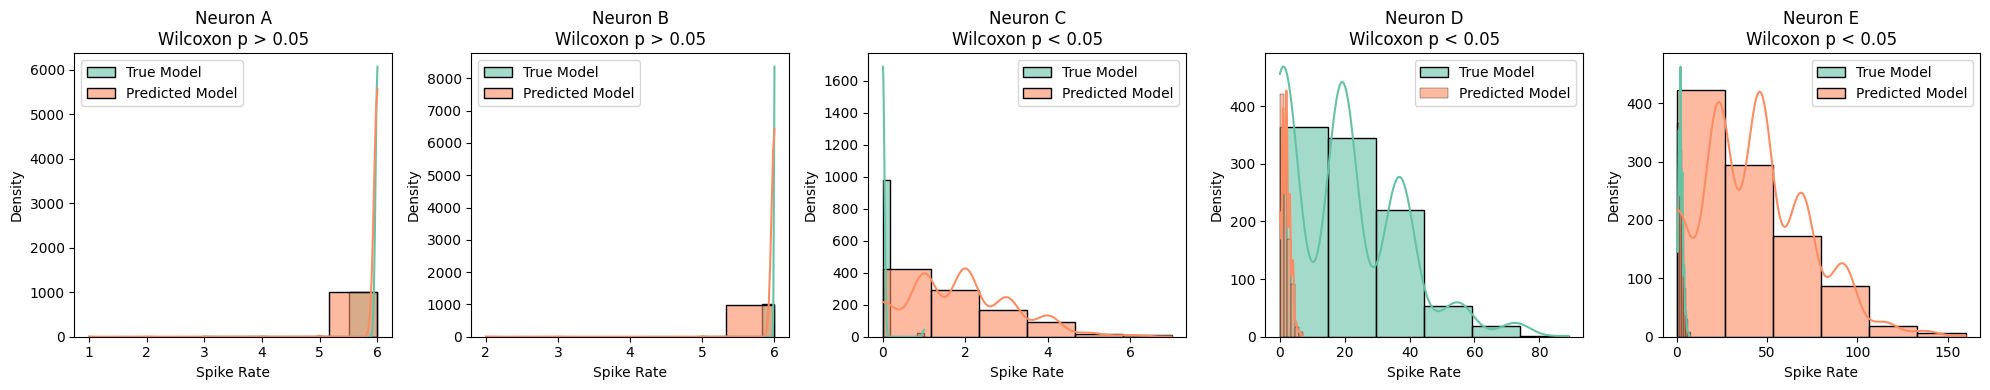

In [37]:
from scipy.stats import wilcoxon

# Plotting Historgrams on Top of Eachother
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
palette = sns.color_palette("Set2", 2)  # Two colors

for i, neuron_id in enumerate(neuron_names):
    ax = axes[i]

    # Wilcoxon signed-rank test - show if the distributions are different
    stat, pval = wilcoxon(spike_rates_true[i, :], spike_rates_predicted[i, :])
    
    # Plot true spike rates
    sns.histplot(spike_rates_true[i, :], bins=6, kde=True, color=palette[0], label='True Model', ax=ax, alpha=0.6)
    
    # Plot predicted spike rates
    sns.histplot(spike_rates_predicted[i, :], bins=6, kde=True, color=palette[1], label='Predicted Model', ax=ax, alpha=0.6)

    if pval >= 0.05:
        ax.set_title(f"Neuron {neuron_id}\nWilcoxon p > 0.05")
    elif pval < 0.05:
        ax.set_title(f"Neuron {neuron_id}\nWilcoxon p < 0.05")
    
    ax.set_xlabel("Spike Rate")
    ax.set_ylabel("Density")
    ax.legend()

plt.tight_layout()
plt.show()